***Задача 1***

Загрузите таблицу из файла `advertising_1.csv` и сохраните её в датафрейм `adv1_df`. Укажите в качестве индекса столбец `Number`. Выведите на экран первые десять строк.


In [1]:
# подключаем гугл-диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# перехожу в директорию с ноутбуком
os.chdir('/content/drive/MyDrive/SkillBox/Pandas')

In [3]:
# текущая директория
os.getcwd()

'/content/drive/MyDrive/SkillBox/Pandas'

In [4]:
import pandas as pd

In [5]:
# Ваш код здесь
adv1_df = pd.read_csv('12.6.Data/advertising_1.csv')
adv1_df = adv1_df.set_index('Number')
adv1_df

,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
Number,,,,
5,68.95,256.09,Cloned 5thgeneration orchestration,0
6,80.23,193.77,Monitored national standardization,0
8,74.15,245.89,Triple-buffered reciprocal time-frame,0
9,NaN,225.58,Robust logistical utilization,0
10,59.99,226.74,Sharable client-driven software,0
...,...,...,...,...
525,46.61,136.18,Progressive intermediate throughput,1
526,63.26,120.46,Customizable holistic archive,1
527,79.16,202.90,Compatible intermediate concept,0


***Задача 2***

Выведите размер датафрейма `adv1_df`.

In [6]:
# Ваш код здесь
adv1_df.shape

(500, 4)

In [8]:
adv1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5 to 529
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  450 non-null    float64
 1   Daily Internet Usage      448 non-null    float64
 2   Ad Topic Line             500 non-null    object 
 3   Clicked on Ad             500 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 19.5+ KB


In [7]:
adv1_df.columns

Index(['Daily Time Spent on Site', 'Daily Internet Usage', 'Ad Topic Line',
       'Clicked on Ad'],
      dtype='object')

In [18]:
adv1_df['Ad Topic Line'].nunique()

500

array([[<Axes: title={'center': 'Daily Internet Usage'}>,
        <Axes: title={'center': 'Daily Time Spent on Site'}>]],
      dtype=object)

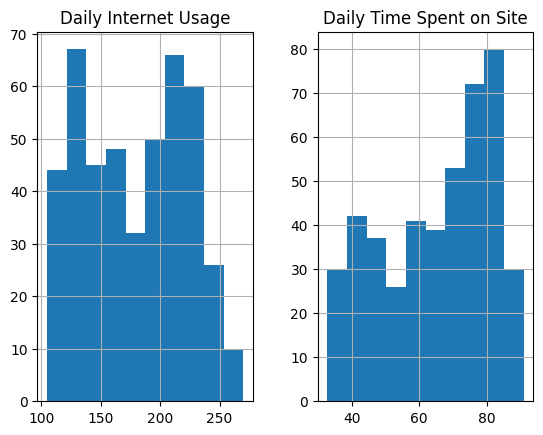

In [25]:
adv1_df.hist(column=['Daily Internet Usage','Daily Time Spent on Site'])

С помощью метода agg() и встроенных функций можно вычислять агрегированные значения. Например, вычислим максимум, минимум, среднее, стандартное отклдонение для показателей ежедневное время нахождения в интернете и ежедневное время нахождения на сайте пользователя. Для этого исключим столбец 'Ad Topic Line'  поскольку он содержит категории, а не численные показатели и 'Clicked on Ad' - поскольку он хоть и содержит числа (1 и 0), но это скорее числовые категории. :

In [14]:
adv1_df.drop(['Ad Topic Line','Clicked on Ad'], axis=1).agg(['max','min', 'mean', 'std'])

,Daily Time Spent on Site,Daily Internet Usage
max,90.970000,269.960000
min,32.840000,104.780000
mean,65.195667,179.493170
std,16.007425,43.098508


In [29]:
import numpy as np
np.linspace(32.840000, 90.970000,11) # 11 точек создают 10 корзин

array([32.84 , 38.653, 44.466, 50.279, 56.092, 61.905, 67.718, 73.531,
       79.344, 85.157, 90.97 ])

In [35]:
# Daily Time Spent on Site
# max   =    	90.970000
# min   =    	32.840000

# 11 точек создают 10 корзин
lst = np.array([32.84 , 38.653, 44.466, 50.279, 56.092, 61.905, 67.718, 73.531, 79.344, 85.157, 90.97 ])
bins = list(zip(lst[0:],lst[1:]) )
bins

[(32.84, 38.653),
 (38.653, 44.466),
 (44.466, 50.279),
 (50.279, 56.092),
 (56.092, 61.905),
 (61.905, 67.718),
 (67.718, 73.531),
 (73.531, 79.344),
 (79.344, 85.157),
 (85.157, 90.97)]

In [36]:
# строим функцию классификатор по корзинам
l = lst[1:]
def numb_of_bin(var):
  for i in range(len(l)):
    if var < l[i]:
      return i

In [37]:
# создаём новый столбец категорий пользователей сайтом с помощью метода apply
adv1_df['Daily Time Spent on Site_category'] = adv1_df['Daily Time Spent on Site'].apply(numb_of_bin)

In [38]:
adv1_df

,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad,Daily Time Spent on Site_category
Number,,,,,
5,68.95,256.09,Cloned 5thgeneration orchestration,0,6.0
6,80.23,193.77,Monitored national standardization,0,8.0
8,74.15,245.89,Triple-buffered reciprocal time-frame,0,7.0
9,NaN,225.58,Robust logistical utilization,0,NaN
10,59.99,226.74,Sharable client-driven software,0,4.0
...,...,...,...,...,...
525,46.61,136.18,Progressive intermediate throughput,1,2.0
526,63.26,120.46,Customizable holistic archive,1,5.0
527,79.16,202.90,Compatible intermediate concept,0,7.0


С помощью метода groupby() можно находить значения агрегированных данных по определенным категориям.

In [61]:
# по одинаковым названиям параметра животное вычисляем аггрегатные функции
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],

                   'Max Speed': [380., 370., 24., 26.]})

df.groupby(['Animal']).agg(['mean','sum'])

Max Speed       
            mean    sum
Animal                 
Falcon     375.0  750.0
Parrot      25.0   50.0

In [63]:
df.pivot_table(index=['Animal'],aggfunc=['mean','sum'])

,mean,sum
,Max Speed,Max Speed
Animal,,
Falcon,375.0,750.0
Parrot,25.0,50.0


In [42]:
adv1_df.groupby(['Daily Time Spent on Site_category']).agg(['mean', 'median'])

<ipython-input-42-945760148456>:1: FutureWarning: ['Ad Topic Line'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  adv1_df.groupby(['Daily Time Spent on Site_category']).agg(['mean', 'median'])


Daily Time Spent on Site          \
                                                      mean  median   
Daily Time Spent on Site_category                                    
0.0                                              35.953333  36.145   
1.0                                              41.601667  41.685   
2.0                                              47.394595  47.480   
3.0                                              53.373846  53.260   
4.0                                              58.861463  59.120   
5.0                                              64.925641  65.590   
6.0                                              70.790377  70.680   
7.0                                              76.441806  76.735   
8.0                                              81.904375  81.585   
9.0                                              87.117931  86.780   

                                  Daily Internet Usage          Clicked on Ad  \
                                                  mean   median          mean   
Daily Time Spent on Site_category                                               
0.0                                         174.096429  168.390      1.000000   
1.0                                         150.796486  145.850      1.000000   
2.0                                         139.966471  136.290      0.972973   
3.0                                         149.575217  135.310      1.000000   
4.0                                         141.260278  126.165      0.853659   
5.0                                         177.908000  158.050      0.512821   
6.0                                         190.027959  201.260      0.301887   
7.0                                         198.807619  210.540      0.166667   
8.0                                         213.867746  216.490      0.087500   
9.0                                         203.901250  208.295      0.034483   

                                          
                                  median  
Daily Time Spent on Site_category         
0.0                                  1.0  
1.0                                  1.0  
2.0                                  1.0  
3.0                                  1.0  
4.0                                  1.0  
5.0                                  1.0  
6.0                                  0.0  
7.0                                  0.0  
8.0                                  0.0  
9.0                                  0.0

In [51]:
agg_func = {'Daily Time Spent on Site_category':['count']}
adv1_df.groupby(['Daily Time Spent on Site_category']).agg(agg_func)

,Daily Time Spent on Site_category
,count
Daily Time Spent on Site_category,
0.0,30
1.0,42
2.0,37
3.0,26
4.0,41
5.0,39
6.0,53
7.0,72


Функции порядка

В этом разделе покажем, как получать максимальное и минимальное количество кликов магазина по категориям рекламы. Будем использовать функции first() и last():

In [55]:
agg_func = {'Daily Time Spent on Site': ['first', 'last']}
adv1_df.sort_values(by='Daily Time Spent on Site').groupby('Daily Time Spent on Site_category').agg(agg_func)

Daily Time Spent on Site       
                                                     first   last
Daily Time Spent on Site_category                                
0.0                                                  32.84  38.52
1.0                                                  38.91  44.46
2.0                                                  44.49  50.19
3.0                                                  50.33  56.04
4.0                                                  56.14  61.88
5.0                                                  62.06  67.58
6.0                                                  67.80  73.46
7.0                                                  73.71  79.16
8.0                                                  79.36  85.03
9.0                                                  85.23  89.91

Продвинутые примеры агрегаций

С помощью метода agg() можно строить и более сложные примеры. Применим к столбцами различные агрегирующие функции:

In [16]:
dict_func = {'Daily Time Spent on Site': ['mean', 'max','sum'],
             'Daily Internet Usage': ['mean', 'max','sum'],
             'Clicked on Ad' : ['sum']}
print(adv1_df.agg(dict_func))

      Daily Time Spent on Site  Daily Internet Usage  Clicked on Ad
mean                 65.195667             179.49317            NaN
max                  90.970000             269.96000            NaN
sum               29338.050000           80412.94000          252.0


# Агрегация данных с использованием метода groupby()

***Задача 3***

Выведите cреднее ежедневное время нахождения в интернете пользователя под номером 8.

In [ ]:
# Ваш код здесь
# Среднее ежедневное время (Daily Internet Usage) нахождения  8-го пользователя в интернете в минутах.
adv1_df.loc[8,'Daily Internet Usage']

245.89

In [ ]:
# Ваш код здесь
# Среднее ежедневное время (Daily Internet Usage) нахождения  8-го пользователя в интернете в минутах.
adv1_df.loc[8,:]['Daily Internet Usage']

245.89

***Задача 4***

Загрузите таблицу из файла `advertising_2.csv` и сохраните её в датафрейм `adv2_df`. Укажите в качестве индекса стоблец `Number`. Выведите на экран строки для пользователей с номерами с 533-го по 536-й.

In [ ]:
# Ваш код здесь
adv2_df = pd.read_csv('12.6.Data/advertising_2.csv')
adv2_df = adv2_df.set_index('Number')
adv2_df.loc[533:536,:]

,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
Number,,,,
533,46.61,NaN,Ergonomic methodical encoding,1
534,NaN,162.03,Compatible dedicated productivity,0
535,65.10,118.10,Up-sized real-time methodology,1
536,53.44,NaN,Up-sized next generation architecture,1


***Задача 5***

Выведите сводную таблицу описательных статистик для датафрейма `adv2_df`, вызвав необходимый метод на всём датафрейме.

Глядя на вывод, напишите, столбец с каким названием не содержит незаполненных значений.

*Подсказка:*  В сводной таблице не содержится информации о количестве строк всего датафрейма, поэтому для сначала распечатайте общее количество строк датафрейма.

*Рекомендация:* Кроме изученного метода `describe` для описания датафрейма и получения информации о пропущенных значениях полезен метод [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [ ]:
# описательная статистика
adv2_df.describe()

,Daily Time Spent on Site,Daily Internet Usage,Clicked on Ad
count,184.000000,184.000000,200.000000
mean,66.494728,186.809674,0.420000
std,15.414725,43.844580,0.494797
min,32.910000,108.030000,0.000000
25%,52.805000,148.955000,0.000000
50%,71.150000,194.170000,0.000000
75%,78.352500,225.372500,1.000000
max,91.430000,259.760000,1.000000


In [ ]:
# Ваш код здесь
print(adv2_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 530 to 739
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  184 non-null    float64
 1   Daily Internet Usage      184 non-null    float64
 2   Ad Topic Line             200 non-null    object 
 3   Clicked on Ad             200 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB
None


In [ ]:
adv2_df['Daily Time Spent on Site'].isna()

Number
530     True
531    False
532    False
533    False
534     True
       ...  
735    False
736    False
737    False
738    False
739    False
Name: Daily Time Spent on Site, Length: 200, dtype: bool

In [ ]:
adv2_df[ adv2_df['Daily Time Spent on Site'].isna() | adv2_df['Daily Internet Usage'].isna()]

,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
Number,,,,
530,NaN,165.27,Re-engineered impactful software,0
531,43.65,NaN,Business-focused background synergy,1
533,46.61,NaN,Ergonomic methodical encoding,1
534,NaN,162.03,Compatible dedicated productivity,0
536,53.44,NaN,Up-sized next generation architecture,1
544,72.03,NaN,Up-sized bi-directional infrastructure,0
554,73.89,NaN,Multi-channeled asymmetric installation,0
563,NaN,164.25,Optional regional throughput,0
565,NaN,109.22,Fundamental methodical support,1


In [ ]:
adv2_df[ adv2_df['Daily Time Spent on Site'].isna() | adv2_df['Daily Internet Usage'].isna()].shape

(32, 4)

In [ ]:
#lheujq способ подсчитать пропуски (пустые значения) в датафрейме
adv2_df.isnull().sum()

Daily Time Spent on Site    16
Daily Internet Usage        16
Ad Topic Line                0
Clicked on Ad                0
dtype: int64

In [ ]:
# Ваш код здесь
print('Не содержит незаполненных значений столбец:', '"Ad Topic Line" и "Clicked on Ad"')

Не содержит незаполненных значений столбец: "Ad Topic Line" и "Clicked on Ad"


***Задача 6***

Добавьте к датафрейму `adv1_df` в конец датафрейм `adv2_df` с помощью метода `append`.

Сохраните объединенный датафрейм в новой переменной `adv12_df` и распечатайте его.

In [ ]:
# Ваш код здесь
adv12_df = adv1_df.append(adv2_df)
adv12_df

<ipython-input-17-acab31454c06>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adv12_df = adv1_df.append(adv2_df)


,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
Number,,,,
5,68.95,256.09,Cloned 5thgeneration orchestration,0
6,80.23,193.77,Monitored national standardization,0
8,74.15,245.89,Triple-buffered reciprocal time-frame,0
9,NaN,225.58,Robust logistical utilization,0
10,59.99,226.74,Sharable client-driven software,0
...,...,...,...,...
735,65.53,190.17,Pre-emptive client-server installation,0
736,61.87,NaN,Multi-channeled attitude-oriented toolset,0
737,83.16,NaN,Decentralized 24hour approach,0


***Задача 7***

Для объединённого датафрейма `adv12_df` распечатайте среднее время, проводимое пользователем на сайте компании.

In [ ]:
# Ваш код здесь
adv12_df['Daily Time Spent on Site'].mean()

65.57268138801263

***Задача 8***

Из объединённого датафрейма `adv12_df` выберите и распечатайте строки только с теми пользователями, для которых неизвестно среднее ежедневное время, проводимое пользователем на сайте компании.

In [ ]:
# Ваш код здесь
adv12_df[adv12_df['Daily Time Spent on Site'].isna()]

,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
Number,,,,
9,NaN,225.58,Robust logistical utilization,0
12,NaN,131.76,Reactive local challenge,1
19,NaN,143.56,Grass-roots coherent extranet,1
27,NaN,164.83,Mandatory disintermediate utilization,1
34,NaN,209.82,Business-focused value-added definition,0
...,...,...,...,...
672,NaN,235.97,Customizable value-added project,0
674,NaN,126.44,Reactive impactful challenge,1
685,NaN,200.71,Focused multi-state workforce,0


***Задача 9***

Загрузите таблицу из файла `advertising_3.csv` и сохраните её в датафрейм `adv3_df`. Укажите в качестве индекса стоблец `Number`. Выведите на экран столбцы `Ad Topic Line` и `Clicked on Ad`.

In [ ]:
# Ваш код здесь
adv3_df = pd.read_csv('12.6.Data/advertising_3.csv')
adv3_df = adv3_df.set_index('Number')
adv3_df[['Ad Topic Line','Clicked on Ad']]

,Ad Topic Line,Clicked on Ad
Number,,
740,Distributed bifurcated challenge,0
741,Customizable zero-defect Internet solution,0
742,Self-enabling zero administration neural-net,1
744,Open-architected system-worthy ability,0
745,Quality-focused maximized extranet,1
...,...,...
999,Front-line bifurcated ability,1
1000,Fundamental modular algorithm,1
1001,Grass-roots cohesive monitoring,1


***Задача 10***

Добавьте к датафрейму `adv12_df` в конец датафрейм `adv3_df` с помощью метода `concat`. Явно пропишите значение параметра `axis`.

Сохраните объединённый датафрейм в новой переменной `adv123_df` и распечатайте его.

In [ ]:
# Ваш код здесь
adv123_df = pd.concat([adv12_df, adv3_df])
adv123_df

,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
Number,,,,
5,68.95,256.09,Cloned 5thgeneration orchestration,0
6,80.23,193.77,Monitored national standardization,0
8,74.15,245.89,Triple-buffered reciprocal time-frame,0
9,NaN,225.58,Robust logistical utilization,0
10,59.99,226.74,Sharable client-driven software,0
...,...,...,...,...
999,43.70,173.01,Front-line bifurcated ability,1
1000,72.97,208.58,Fundamental modular algorithm,1
1001,51.30,NaN,Grass-roots cohesive monitoring,1


***Задача 11***

Для объединённого датафрейма `adv123_df` выберите только те строки, в которых пользователи кликнули на рекламное сообщение. Сохраните полученный результат в датафрейм `success_adv_df`, распечатайте размер нового датафрейма.

In [ ]:
# Ваш код здесь
success_adv_df = adv123_df [adv123_df['Clicked on Ad'] == 1 ]
success_adv_df

,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
Number,,,,
12,NaN,131.76,Reactive local challenge,1
15,47.64,122.02,Centralized neutral neural-net,1
17,69.57,113.12,Centralized content-based focus group,1
19,NaN,143.56,Grass-roots coherent extranet,1
20,63.45,140.64,Persistent demand-driven interface,1
...,...,...,...,...
997,69.17,123.62,Extended leadingedge solution,1
999,43.70,173.01,Front-line bifurcated ability,1
1000,72.97,208.58,Fundamental modular algorithm,1


***Задача 12***

Загрузите таблицу с данными пользователей из файла `users.csv` и сохраните её в датафрейм `users_df`. Индекс не указывайте.

Распечатайте сам датафрейм и сводную таблицу со статистиками для него.

In [ ]:
# Ваш код здесь
users_df = pd.read_csv('12.6.Data/users.csv')
users_df

,Number,Age,Male,City,Country,Area Income
0,5,NaN,0.0,Wrightburgh,Tunisia,61833.90
1,6,31.0,NaN,West Jodi,Nauru,68441.85
2,7,26.0,0.0,Davidton,San Marino,59785.94
3,8,29.0,1.0,West Terrifurt,Italy,54806.18
4,9,NaN,0.0,South Manuel,Iceland,73889.99
...,...,...,...,...,...,...
975,1000,30.0,NaN,Duffystad,Lebanon,71384.57
976,1001,45.0,1.0,New Darlene,Bosnia and Herzegovina,67782.17
977,1002,51.0,NaN,South Jessica,Mongolia,42415.72
978,1003,19.0,0.0,West Steven,Guatemala,41920.79


In [ ]:
users_df.columns

Index(['Number', 'Age', 'Male', 'City', 'Country', 'Area Income'], dtype='object')

In [ ]:
users_df.iloc[6:8,:]

,Number,Age,Male,City,Country,Area Income
6,11,33.0,0.0,Brandonstad,Myanmar,53852.85
7,12,48.0,1.0,Port Jefferybury,Australia,24593.33


***Задача 13***

Глядя на статистики `users_df`, укажите значения, удовлетворяющие следующим условиям:
1. Возраст самого молодого пользователя сайта: *ваш_ответ*
2. Максимальный средний доход в месте жительства пользователя сайта: *ваш_ответ*
3. Средний возраст пользователя сайта: *ваш_ответ*
4. Количество заполненных значений для колонки, содержащей информацию о том, является пользователь мужчиной или нет: *ваш_ответ*
5. Минимальный номер пользователя: *ваш_ответ*

В этом задании не требуется выбирать по условиям и распечатывать значения, достаточно внимательно посмотреть на статистики и скопировать нужные значения согласно вопросам.

In [ ]:
users_df.Male.value_counts()

0.0    434
1.0    434
Name: Male, dtype: int64

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Number       980 non-null    int64  
 1   Age          860 non-null    float64
 2   Male         868 non-null    float64
 3   City         887 non-null    object 
 4   Country      888 non-null    object 
 5   Area Income  903 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 46.1+ KB


In [ ]:
users_df[users_df.Male == 0].shape[0]

434

In [ ]:
users_df[users_df.Male == 1]['Male'].value_counts(), users_df[users_df.Male == 0]['Male'].value_counts()

(1.0    434
 Name: Male, dtype: int64,
 0.0    434
 Name: Male, dtype: int64)

In [ ]:
print('ИТОГ:')
print(f"1. Возраст самого молодого пользователя сайта: {users_df.Age.min()} \n\
2. Максимальный средний доход в месте жительства пользователя сайта: {users_df['Area Income'].max()} \n\
3. Средний возраст пользователя сайта: {users_df.Age.mean():.2f} \n\
4. Количество заполненных значений для колонки, содержащей информацию о том, является пользователь мужчиной или нет: {users_df[users_df.Male == 1].shape[0] + users_df[users_df.Male == 0].shape[0]} \n\
5. Минимальный номер пользователя: {users_df.Number.min()}")

ИТОГ:
1. Возраст самого молодого пользователя сайта: 19.0 
2. Максимальный средний доход в месте жительства пользователя сайта: 79484.8 
3. Средний возраст пользователя сайта: 36.07 
4. Количество заполненных значений для колонки, содержащей информацию о том, является пользователь мужчиной или нет: 868 
5. Минимальный номер пользователя: 5


***Задача 14***

К полученному датафрейму с успешными рекламными сообщениями `success_adv_df` добавьте справа информацию из датафрейма с пользователями `users_df` и сохраните в датафрейм `success_full_df`. В полученном датафрейме должны остаться только те пользователи, номера которых есть в обоих датафреймах. Для этого воспользуйтесь методом `merge` и пропишите явно верные параметры.

Затем распечатайте датафрейм.

*Важно:*

Объединять датафреймы с помощью `merge` можно и по индексам, и по столбцам с разными названиями.
Так как общие значения содержатся в столбце `Number`, но в датафрейме `users_df` данный столбец является обычным столбцом, а в `success_adv_df` является индексом, перед тем как объединять, переведите столбец `Number` в `success_adv_df` в обычный столбец.

Для этого перед объединением пропишите:
```
success_adv_df = success_adv_df.reset_index()
```

[Подробнее о reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)

In [ ]:
success_adv_df

,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
Number,,,,
12,NaN,131.76,Reactive local challenge,1
15,47.64,122.02,Centralized neutral neural-net,1
17,69.57,113.12,Centralized content-based focus group,1
19,NaN,143.56,Grass-roots coherent extranet,1
20,63.45,140.64,Persistent demand-driven interface,1
...,...,...,...,...
997,69.17,123.62,Extended leadingedge solution,1
999,43.70,173.01,Front-line bifurcated ability,1
1000,72.97,208.58,Fundamental modular algorithm,1


In [ ]:
# переводим столбец Number в success_adv_df в обычный столбец
success_adv_df = success_adv_df.reset_index()
success_adv_df

,Number,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
0,12,NaN,131.76,Reactive local challenge,1
1,15,47.64,122.02,Centralized neutral neural-net,1
2,17,69.57,113.12,Centralized content-based focus group,1
3,19,NaN,143.56,Grass-roots coherent extranet,1
4,20,63.45,140.64,Persistent demand-driven interface,1
...,...,...,...,...,...
470,997,69.17,123.62,Extended leadingedge solution,1
471,999,43.70,173.01,Front-line bifurcated ability,1
472,1000,72.97,208.58,Fundamental modular algorithm,1
473,1001,51.30,NaN,Grass-roots cohesive monitoring,1


In [ ]:
# К полученному датафрейму с успешными рекламными сообщениями success_adv_df
# добавьте справа информацию из датафрейма с пользователями users_df и
# сохраните в датафрейм success_full_df. В полученном датафрейме должны остаться только те пользователи,
# номера которых есть в обоих датафреймах. Для этого воспользуйтесь методом merge и пропишите явно верные параметры.
success_full_df = success_adv_df.merge( users_df, left_on='Number', right_on='Number', how = 'inner')
success_full_df

,Number,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad,Age,Male,City,Country,Area Income
0,12,NaN,131.76,Reactive local challenge,1,48.0,1.0,Port Jefferybury,Australia,24593.33
1,15,47.64,122.02,Centralized neutral neural-net,1,49.0,NaN,West Brandonton,Qatar,45632.51
2,17,69.57,113.12,Centralized content-based focus group,1,48.0,1.0,West Katiefurt,Egypt,51636.92
3,19,NaN,143.56,Grass-roots coherent extranet,1,33.0,0.0,NaN,Barbados,30976.00
4,20,63.45,140.64,Persistent demand-driven interface,1,23.0,NaN,NaN,Spain,52182.23
...,...,...,...,...,...,...,...,...,...,...
459,997,69.17,123.62,Extended leadingedge solution,1,40.0,NaN,New Patrick,Montenegro,66193.81
460,999,43.70,173.01,Front-line bifurcated ability,1,28.0,0.0,Nicholasland,Mayotte,63126.96
461,1000,72.97,208.58,Fundamental modular algorithm,1,30.0,NaN,Duffystad,Lebanon,71384.57
462,1001,51.30,NaN,Grass-roots cohesive monitoring,1,45.0,1.0,New Darlene,Bosnia and Herzegovina,67782.17


***Задача 15***

Для объединённого датафрейма с пользователями, которые кликнули на рекламное сообщение `success_full_df`, отобразите сводную таблицу со статистиками для строковых колонок (`Ad Topic Line`, `City`, `Country`).


In [ ]:
# Ваш код здесь
success_full_df[['Ad Topic Line', 'City', 'Country']].describe()

,Ad Topic Line,City,Country
count,464,420,418
unique,464,412,203
top,Reactive local challenge,Lake James,Ethiopia
freq,1,2,7


In [ ]:
success_full_df[['Ad Topic Line', 'City', 'Country']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 463
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Ad Topic Line  464 non-null    object
 1   City           420 non-null    object
 2   Country        418 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


***Задача 16***

Для объединённого датафрейма с пользователями, которые кликнули на рекламное сообщение `success_full_df`, выведите страну и количество вхождений этой страны в датафрейм.


In [ ]:
# Ваш код здесь
success_full_df['Country'].value_counts()

Ethiopia          7
Australia         6
Turkey            6
Liberia           6
Senegal           5
                 ..
Ukraine           1
United Kingdom    1
Montserrat        1
Timor-Leste       1
Comoros           1
Name: Country, Length: 203, dtype: int64

***Задача 17***

Для объединённого датафрейма с пользователями, которые кликнули на рекламное сообщение `success_full_df`, выведите строки с данными пользователей из страны, название которой встречается чаще остальных.


In [ ]:
# Ваш код здесь
success_full_df[success_full_df['Country'] == 'Ethiopia']

,Number,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad,Age,Male,City,Country,Area Income
245,525,46.61,136.18,Progressive intermediate throughput,1,42.0,0.0,Catherinefort,Ethiopia,65856.74
246,526,63.26,120.46,Customizable holistic archive,1,29.0,1.0,East Donna,Ethiopia,54787.37
278,606,52.13,118.27,Open-source even-keeled database,1,50.0,1.0,West Raymondmouth,Ethiopia,40926.93
297,650,NaN,137.97,Seamless bandwidth-monitored knowledge user,1,28.0,1.0,Markhaven,Ethiopia,39723.97
299,652,46.43,137.20,Reverse-engineered background Graphic Interface,1,28.0,1.0,Brianland,Ethiopia,53922.43
417,919,41.86,128.62,Open-source stable paradigm,1,39.0,1.0,Hawkinsbury,Ethiopia,53041.77
423,930,NaN,NaN,Front-line fresh-thinking installation,1,45.0,0.0,Huffmanchester,Ethiopia,43241.88


***Задача 18***

Для объединённого датафрейма с пользователями, которые кликнули на рекламное сообщение `success_full_df`, выведите строки с данными пользователей из страны, название которой встречается чаще остальных, они проводят в интернете в среднем больше 120 минут и их возраст меньше 30 лет.
Cохраните получившиеся строки в новый датафрейм `filtered_df`.


In [ ]:
# Ваш код здесь
filtered_df = success_full_df[(success_full_df['Country'] == 'Ethiopia') & (success_full_df['Daily Internet Usage'] > 120) & (success_full_df['Age'] < 30)]
filtered_df

,Number,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad,Age,Male,City,Country,Area Income
246,526,63.26,120.46,Customizable holistic archive,1,29.0,1.0,East Donna,Ethiopia,54787.37
297,650,NaN,137.97,Seamless bandwidth-monitored knowledge user,1,28.0,1.0,Markhaven,Ethiopia,39723.97
299,652,46.43,137.20,Reverse-engineered background Graphic Interface,1,28.0,1.0,Brianland,Ethiopia,53922.43


***Задача 19***

Для получившегося датафрейма `filtered_df` выведите строки с данными пользователей, для которых либо не указано среднее время, проведённое на сайте, либо указанное время больше 55 минут. Cохраните получившиеся строки в новый датафрейм `filtered_df2`.


In [ ]:
# Ваш код здесь
filtered_df2 = filtered_df[filtered_df['Daily Time Spent on Site'].isna() | (filtered_df['Daily Time Spent on Site'] > 55)]
filtered_df2

,Number,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad,Age,Male,City,Country,Area Income
246,526,63.26,120.46,Customizable holistic archive,1,29.0,1.0,East Donna,Ethiopia,54787.37
297,650,NaN,137.97,Seamless bandwidth-monitored knowledge user,1,28.0,1.0,Markhaven,Ethiopia,39723.97


**Дополнительные задачи**

***Задача 20***

Для датафрейма `adv123_df` выведите строки с данными, заголовок рекламного сообщения в которых включает слово `model`.

Для этого вам понадобится метод [`contains`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html).

Cохраните получившиеся строки в новый датафрейм `model_df`.


In [ ]:
# Ваш код здесь
model_df = adv123_df[ adv123_df['Ad Topic Line'].str.contains('model', regex=False) ]
model_df

,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
Number,,,,
62,44.98,129.31,Organized global model,1
119,69.00,NaN,Virtual composite model,0
202,78.57,NaN,Exclusive client-driven model,0
211,76.90,212.67,Synchronized multimedia model,0
314,NaN,161.16,Extended interactive model,1
350,65.77,NaN,Function-based fault-tolerant model,0
501,81.10,216.49,Front-line dynamic model,0
538,91.43,209.91,Organic motivating model,0
629,78.17,192.27,Automated mobile model,0


***Задача 21***

Для получившегося датафрейма `model_df` выведите строки с данными пользователей, которые проводят на сайте больше среднего времени по всем пользователям в данном датафрейме. Cохраните получившиеся строки в новый датафрейм `model_popular_df`.


In [ ]:
# Ваш код здесь
model_popular_df = model_df[model_df['Daily Time Spent on Site'] > model_df['Daily Time Spent on Site'].mean()]
model_popular_df

,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
Number,,,,
202,78.57,NaN,Exclusive client-driven model,0
211,76.90,212.67,Synchronized multimedia model,0
501,81.10,216.49,Front-line dynamic model,0
538,91.43,209.91,Organic motivating model,0
629,78.17,192.27,Automated mobile model,0
712,81.90,225.47,Multi-channeled 3rdgeneration model,0
823,81.98,212.88,Up-sized maximized model,0


***Задача 22***

Для объединённого датафрейма `model_popular_df` выведите строки с данными пользователей, номера которых равны 501, 712 и 823.

Для этого вам понадобится метод [`isin`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html).

*Подсказка:* Не забудьте, что номера пользователей находятся не в обычной колонке, а в колонке, являющейся индексом, поэтому вам необходимо получить значения индекса, а не обычной колонки.

In [ ]:
# Ваш код здесь
model_popular_df.loc[[501,712,823],:]

,Daily Time Spent on Site,Daily Internet Usage,Ad Topic Line,Clicked on Ad
Number,,,,
501,81.10,216.49,Front-line dynamic model,0
712,81.90,225.47,Multi-channeled 3rdgeneration model,0
823,81.98,212.88,Up-sized maximized model,0
